In [48]:
import json
from fastdtw import fastdtw
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.spatial import distance
import itertools

In [246]:
with open('tmp/cuysq_6000_preserve3b_learnedseenlongd.json') as f:#('tmp/fogdm_7000_testingnaiveseen.json') as f:
    statetracelearned = json.load(f)['data'][1::]
    flattened = [j for i in statetracelearned[1:2] for j in i]

In [247]:
sensornames = ['S'+str(idx) for idx in range(16)]
run = 3
epoch=0
startday = epoch*30
periods = 8#in three hours 8 periods make a full day
duration =300#days
#
"""
run=2
startday = 39
periods = 8#in three hours 8 periods make a full day
duration =5#days
#"""
select = [startday*periods,(startday+duration)*periods]
traces = {}
for s in sensornames:
    traces[s] = np.asarray([i[s] for i in flattened])#[select[0]:select[1]]])

In [248]:
def extract_feature(t):
    is_active = lambda i:i[0]==0 and i[1]>0
    is_idle = lambda i:i[0]==1 and i[1]>0
    is_sleep = lambda i:i[0]==2 and i[1]>0
    is_dead = lambda i:i[1]==0
    counter = lambda data, f: len([i for i in data if f(i)])
    return [counter(t, f) for f in [is_active,is_idle,is_sleep,is_dead]]
extract_feature(traces['S1'])

[1409, 6, 257, 728]

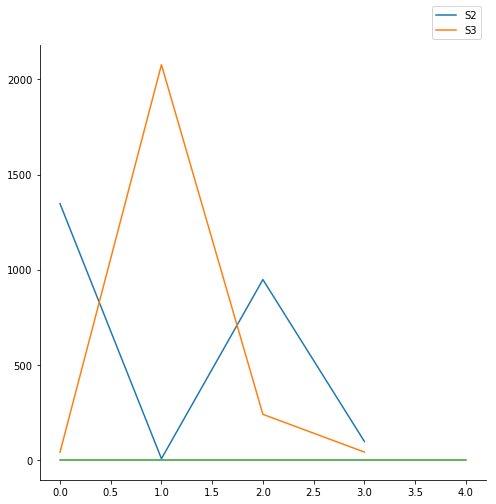

In [257]:
#delayed gratification nodes
fig,ax = plt.subplots(1)
fig.set_size_inches(8,8)
for s in ['S2','S3']:
    ax.plot(extract_feature(traces[s]), label=s)
ax.legend(bbox_to_anchor=((1,1.1)))
ax.plot([0,4],[0,0])
sns.despine()

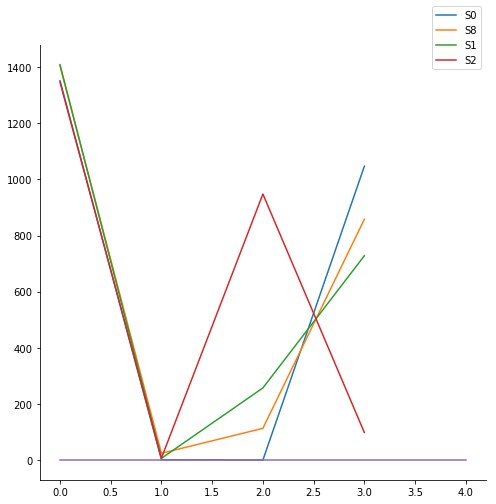

In [255]:
#Workhorse nodes
fig,ax = plt.subplots(1)
fig.set_size_inches(8,8)
for s in ['S0','S8','S1','S2']:
    ax.plot(extract_feature(traces[s]), label=s)
ax.legend(bbox_to_anchor=((1,1.1)))
ax.plot([0,4],[0,0])
sns.despine()

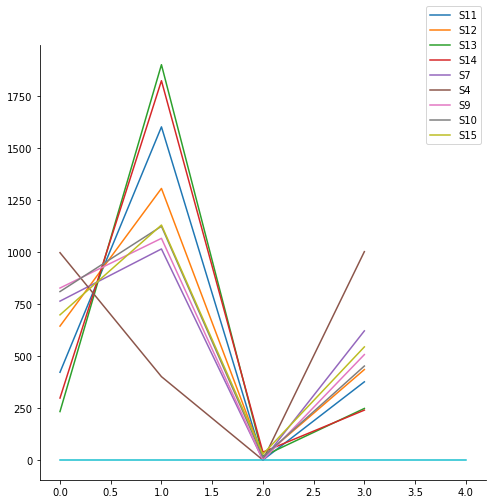

In [256]:
#idle nodes - > kick in when needed
fig,ax = plt.subplots(1)
fig.set_size_inches(8,8)
for s in ['S11','S12','S13','S14','S7']+['S4','S9','S10','S15']:#,'S3']:
    ax.plot(extract_feature(traces[s]), label=s)
ax.legend(bbox_to_anchor=((1,1.1)))
ax.plot([0,4],[0,0])
sns.despine()

In [253]:
data = np.zeros((16,16))
for x,y in itertools.product(sensornames, repeat=2):#, repeat=2):
    idx1 = sensornames.index(x)
    idx2 = sensornames.index(y)
    d = distance.euclidean(extract_feature(traces[x])[1:3], extract_feature(traces[y])[1:3])
    data[idx1,idx2] = d
#distance, path = fastdtw(traces['S1'], traces['S1'])#, dist=euclidean)

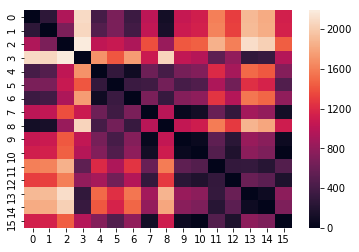

In [254]:
sns.heatmap(data)